In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('data/stud.csv')

In [74]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [75]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [78]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [79]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight
   # From above description we can observe the means of the three numerical columns are very close to each other
   # All standard deviations are also close-between 14.6 and 15.9
   # While there is a minimum score 0 for math, for reading_score the minimum mark = 17 and for writing minimum score = 10

In [80]:
print("categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("categories in 'race/ethinicity' variable:  ", end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable:  ", end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ", end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethinicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [81]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding columns for "Total Score" and "Average"

In [82]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [83]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [85]:
reading_full = df[df['reading_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()
math_full = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths: {math_full}")
print(f"Number of students with less than 20 marks in reading: {reading_full}")
print(f"Number of students with less than 20 marks in writing: {writing_full}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


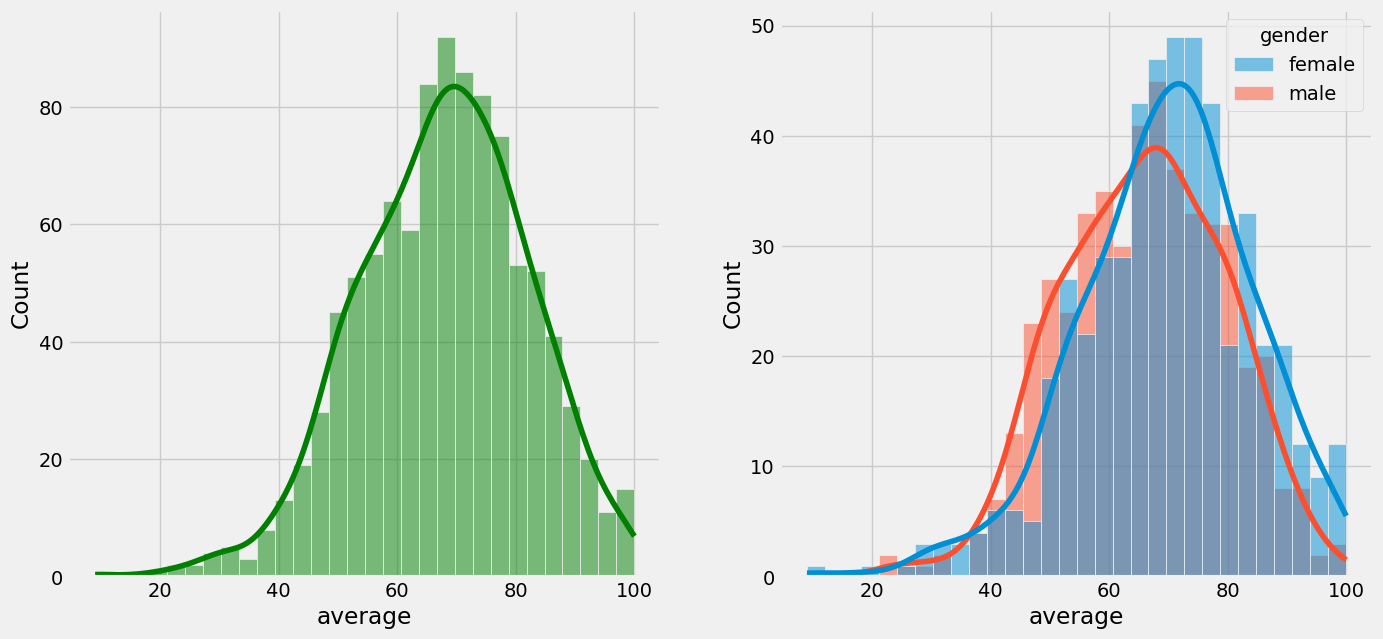

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender', ax=axs[1])

plt.show()


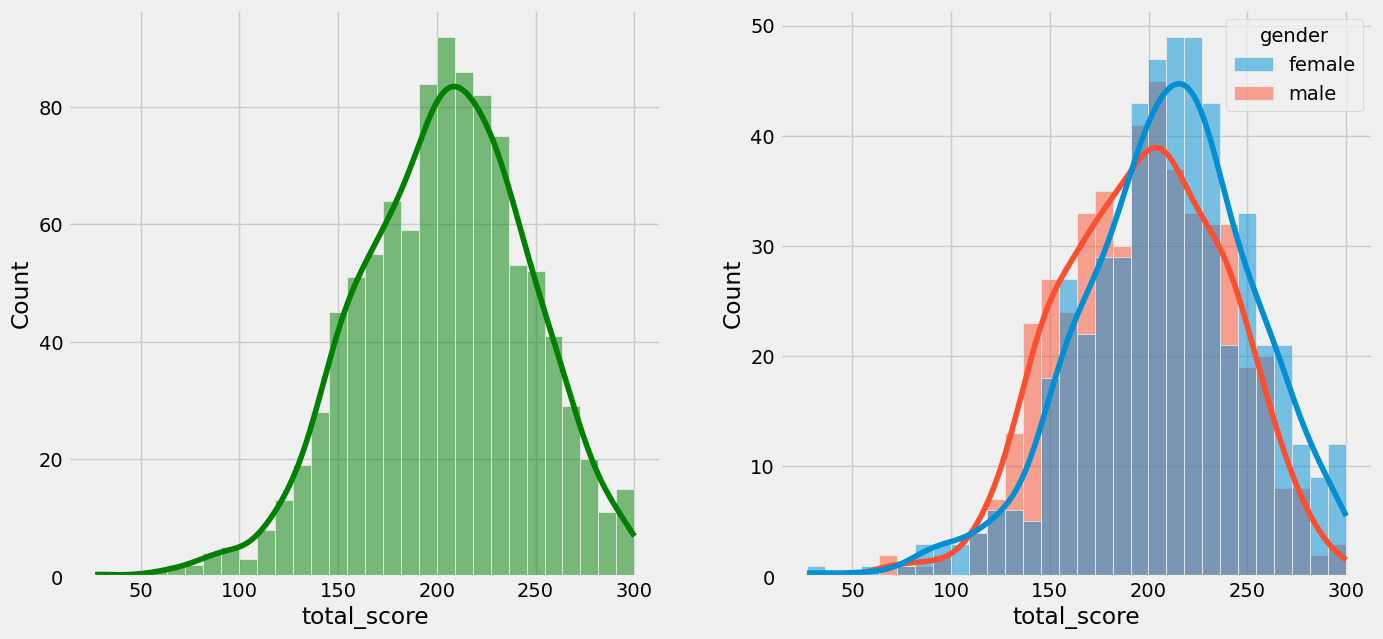

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender', ax=axs[1])

plt.show()


# Insight
#   female students tend to perform well than male students

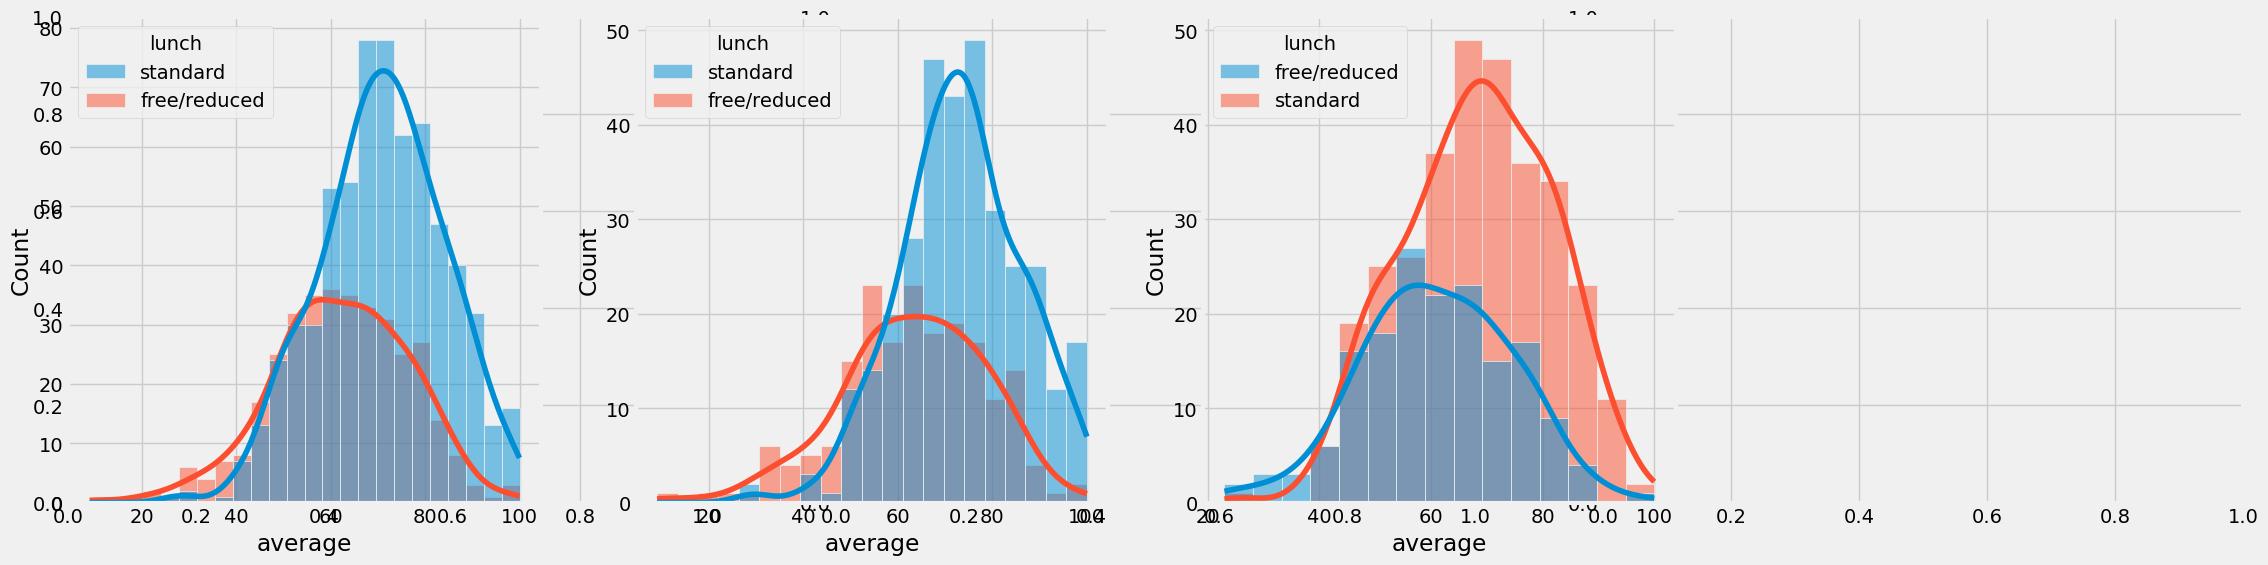

In [88]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

# Insights
# standard lunch helps perform well in exams.
# standard lunch helps perform well in exams be it male or female

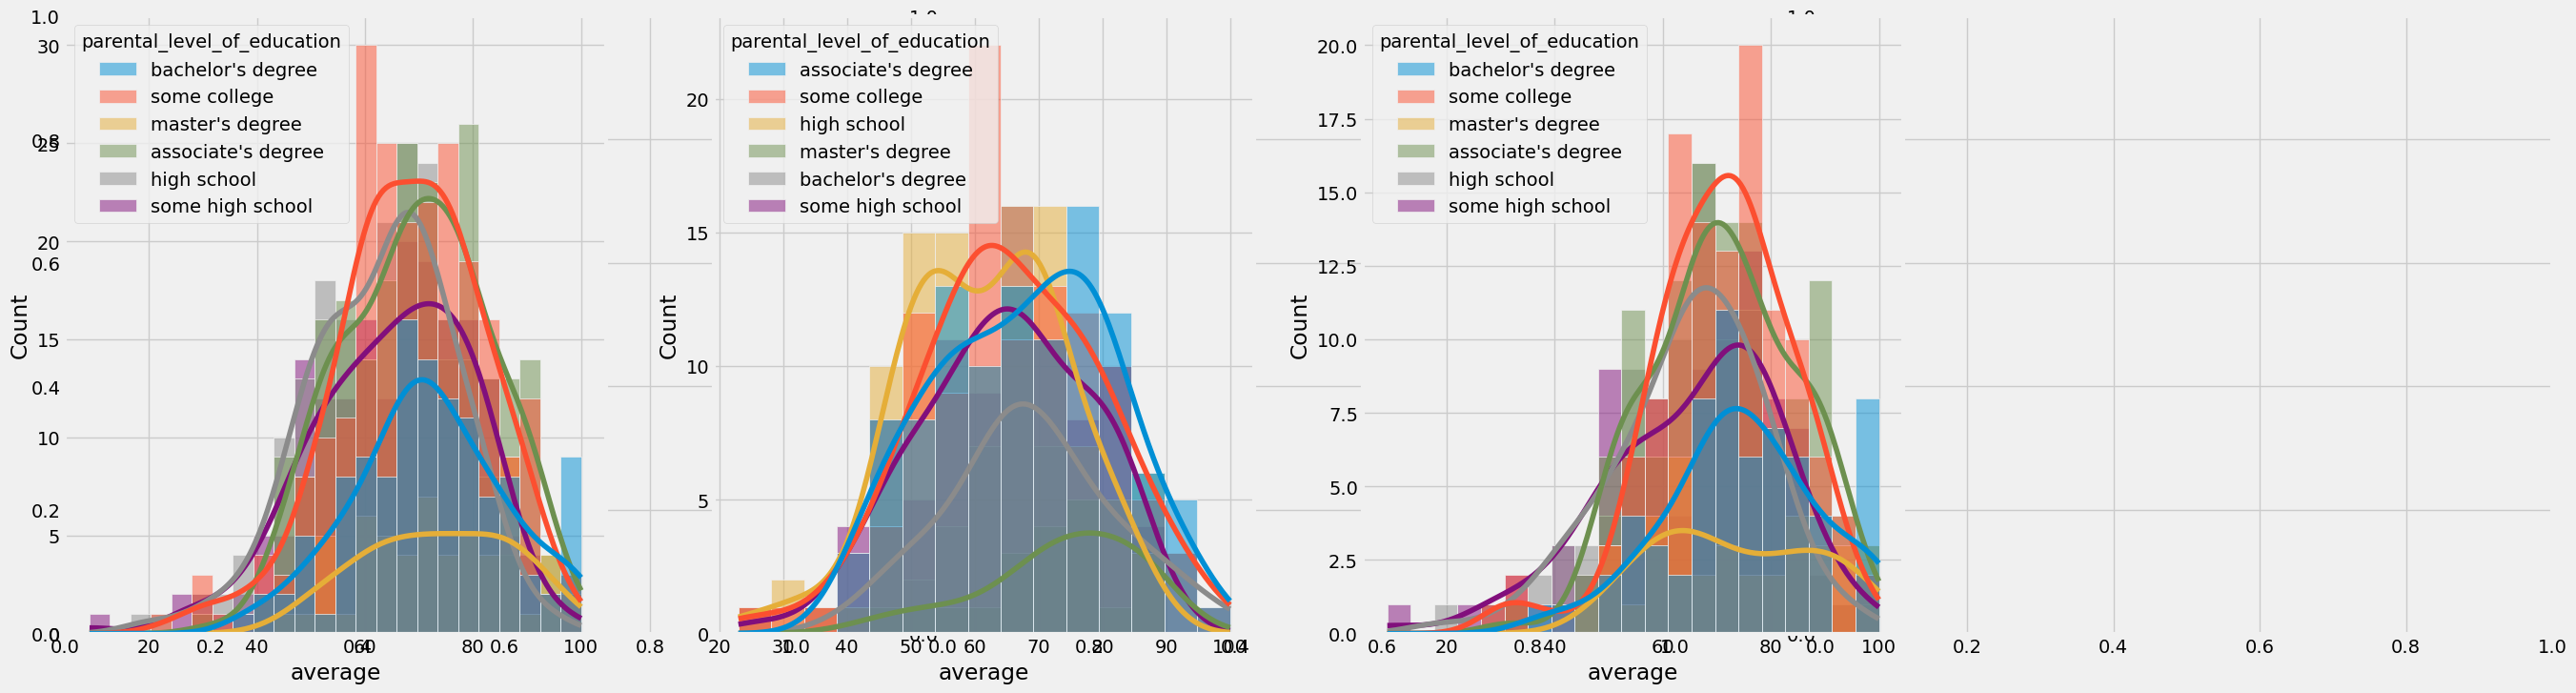

In [89]:
plt.subplots(1,3, figsize=(30,8))
plt.subplot(141)
ax = sns.histplot(data = df, x="average", kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data = df[df.gender=='male'], x="average", kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data = df[df.gender=='female'], x="average", kde=True, hue='parental_level_of_education')
plt.show()

# Insight:
#    1. In general parent's education don't help student perform well in exam.
#    2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in examination.
#    3. 3rd plot we can see there is no effect parent's education on female students.

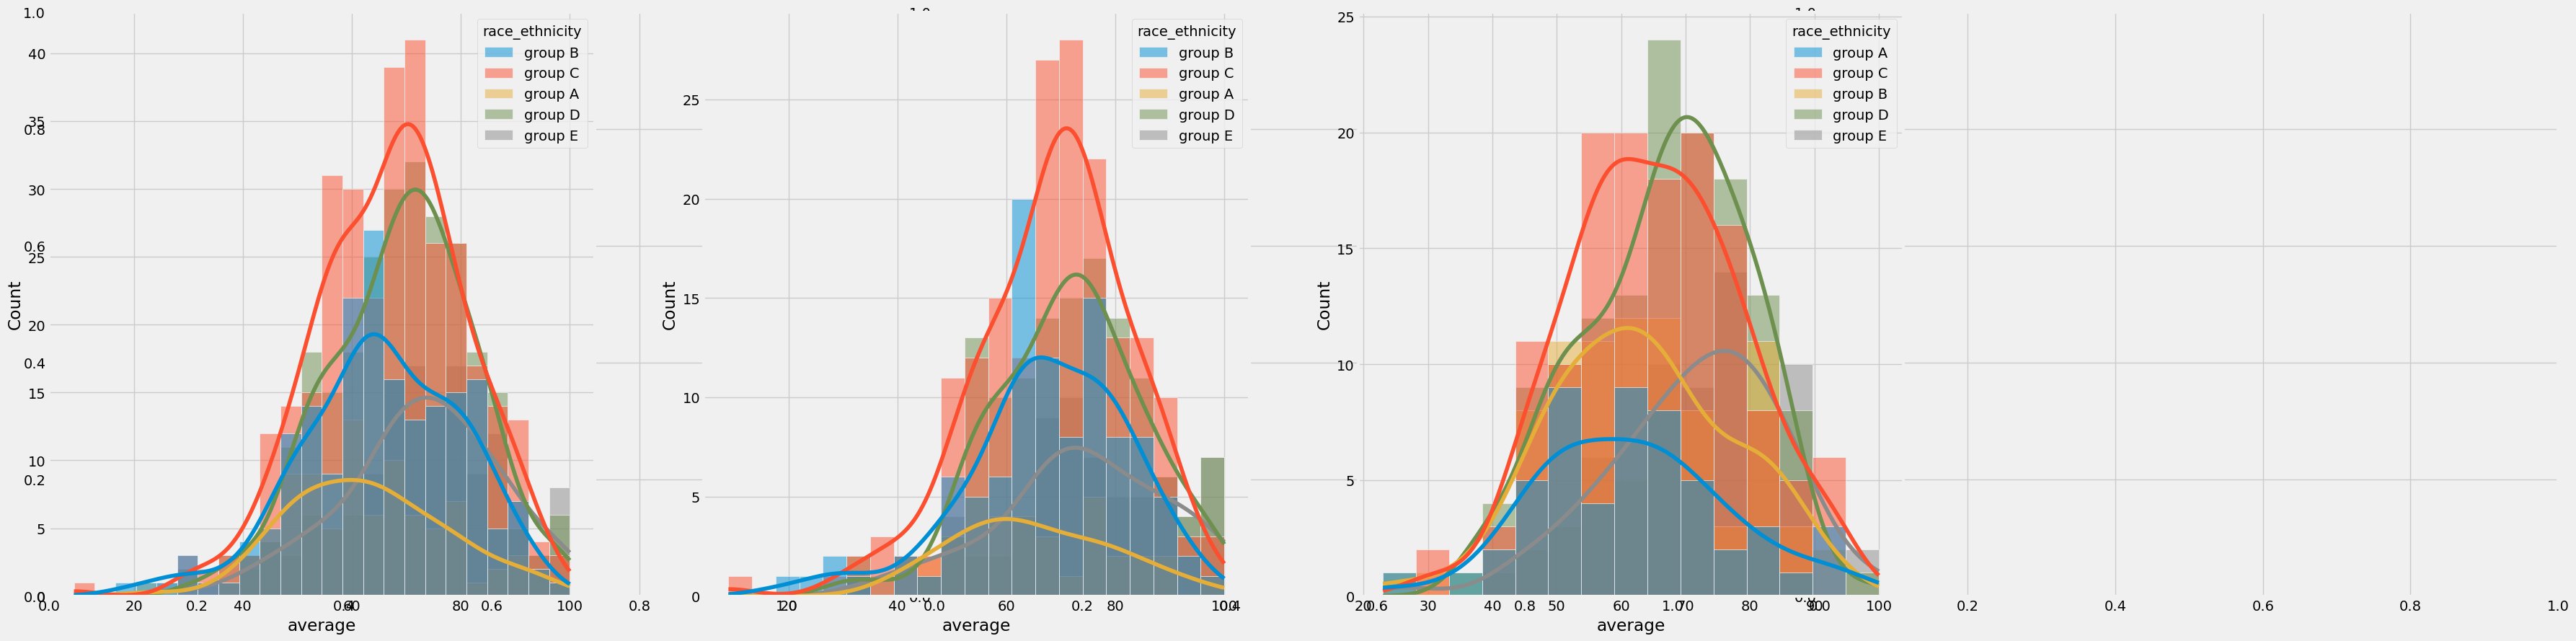

In [90]:
plt.subplots(1,3,figsize=(40,10))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

# Insights from above figure:
# 1. Students of group A and group B tends to perform poorly in exam.
# 2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

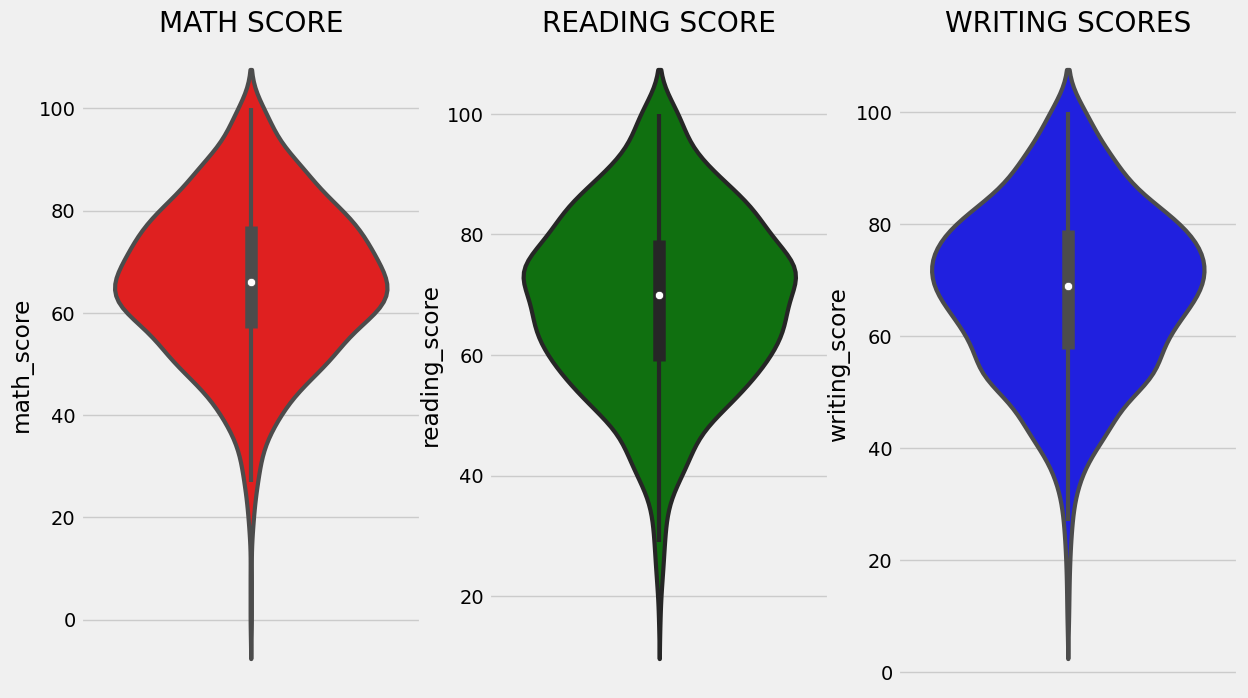

In [91]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y="math_score", data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y='reading_score',data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(y ='writing_score',data=df, color='blue', linewidth=3)

# From the above three plots it is clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# Multivariate analysis using pieplot

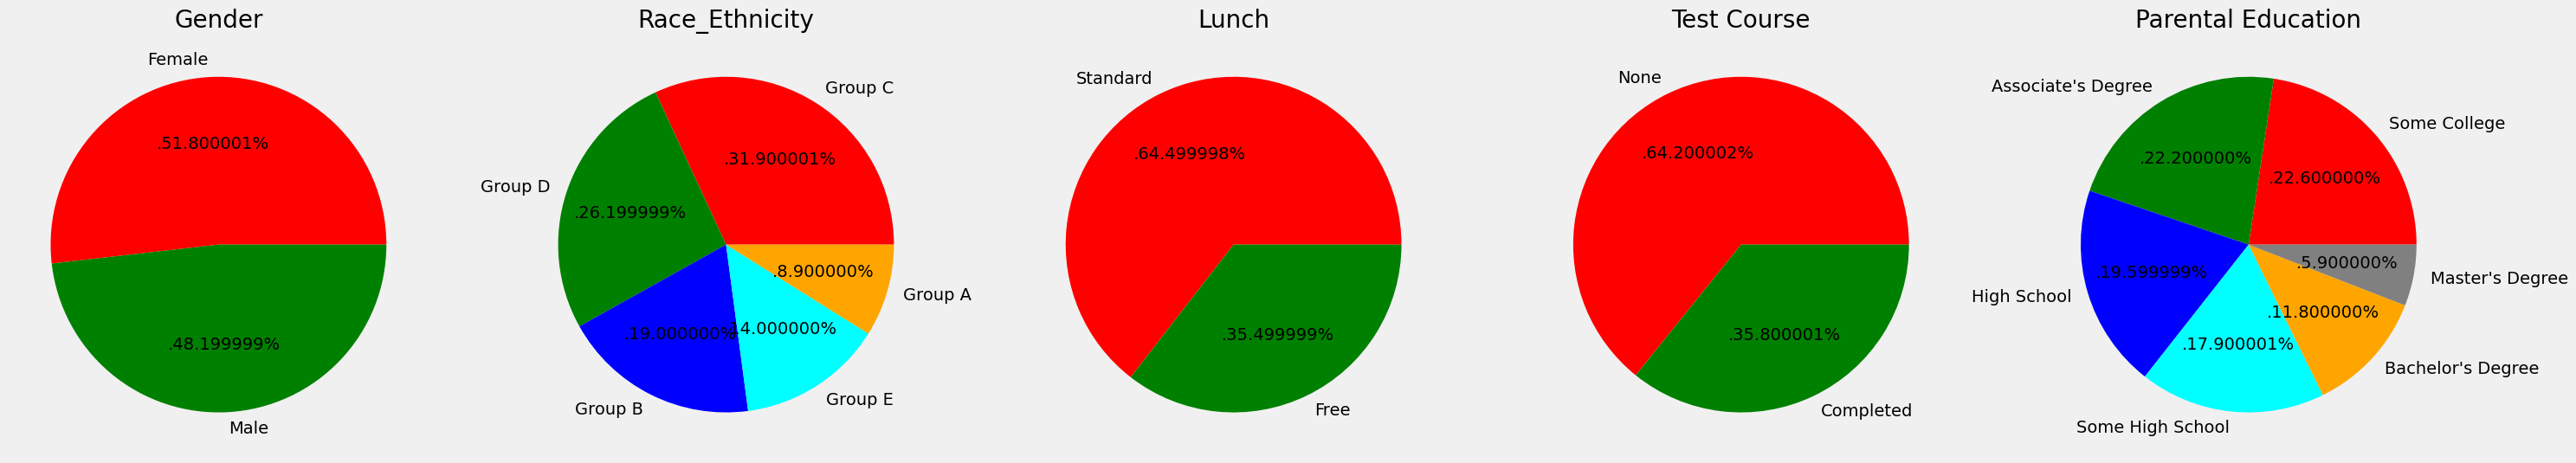

In [92]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']

plt.pie(size, colors=color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"]
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

# Insights
# 1. Number of Male and Female students are almost same.
# 2. Number of students are greatest in Group C
# 3. Number of students who have standard lunch are greater
# 4. Number of students who have not enrolled in any test preparation group are greater
# 5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Gender column Univariate Analysis

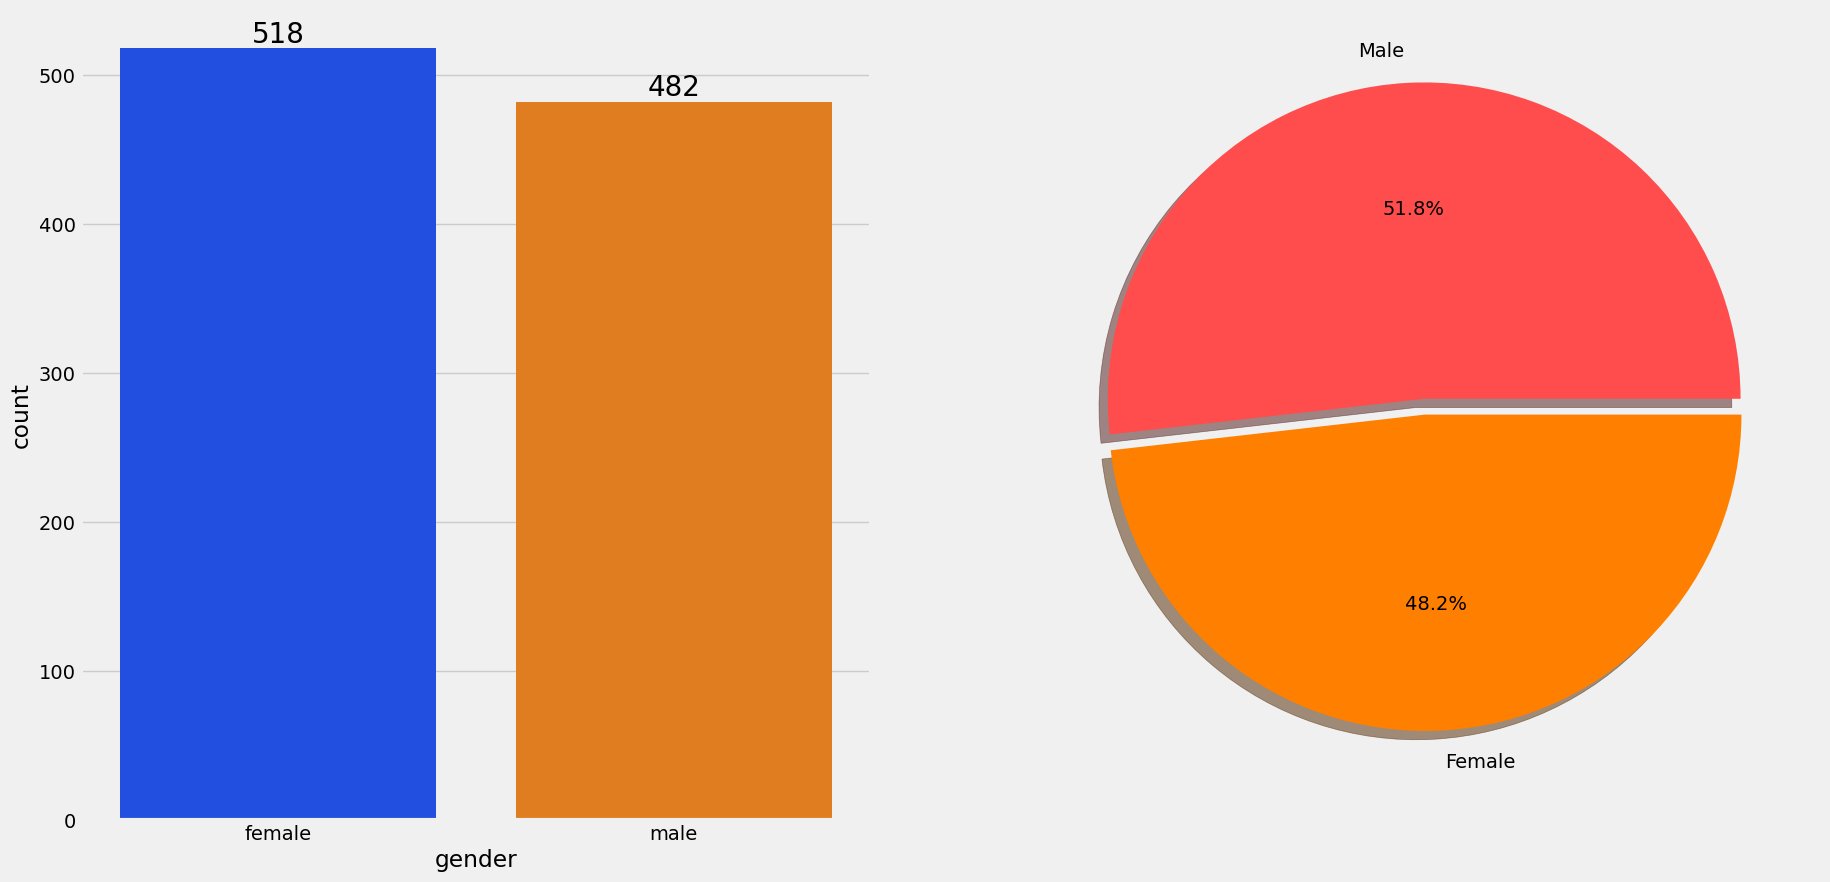

In [93]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0]) 
for container in ax[0].containers: 
    ax[0].bar_label(container, color='black', size=20) 
plt.pie(
    x=df['gender'].value_counts(),
    labels=['Male', 'Female'],
    explode=[0.05, 0],   # two values → one per slice
    autopct='%1.1f%%',   # also fixed typo in format string
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)
plt.show()

# BIVARIATE ANALYSIS (Is gender has any impact on student's performanse?)

In [94]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


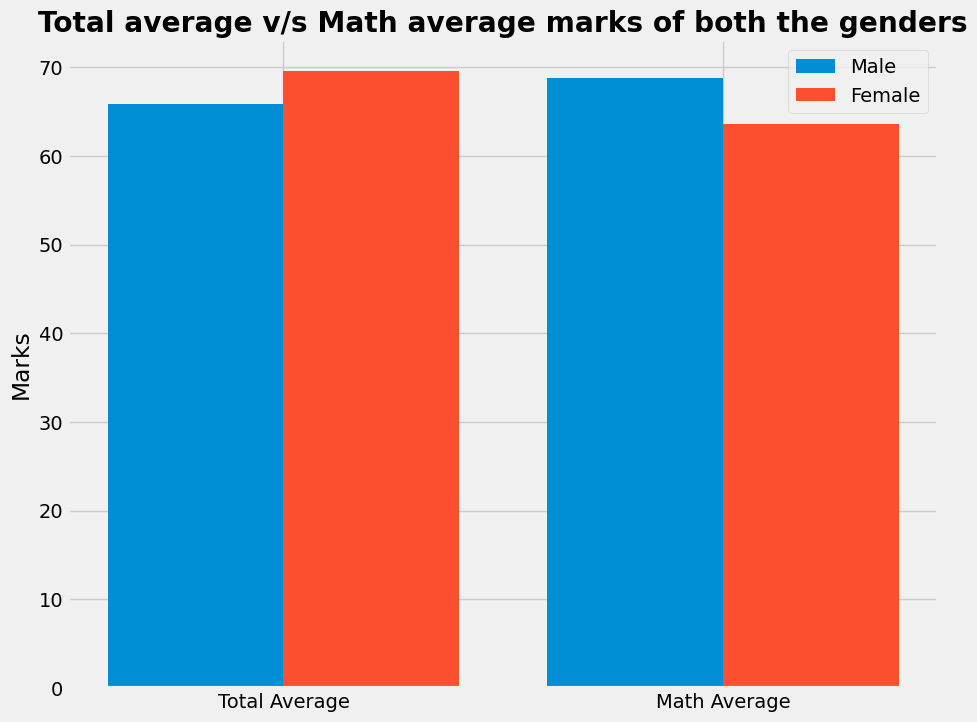

In [95]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight = 'bold')
plt.legend()
plt.show()

# Insights:
#   . On an average females have a better overall score than male
#   . Whereas males have scored higher in maths

# univariate analysis on the basis of Race/Ethinicity

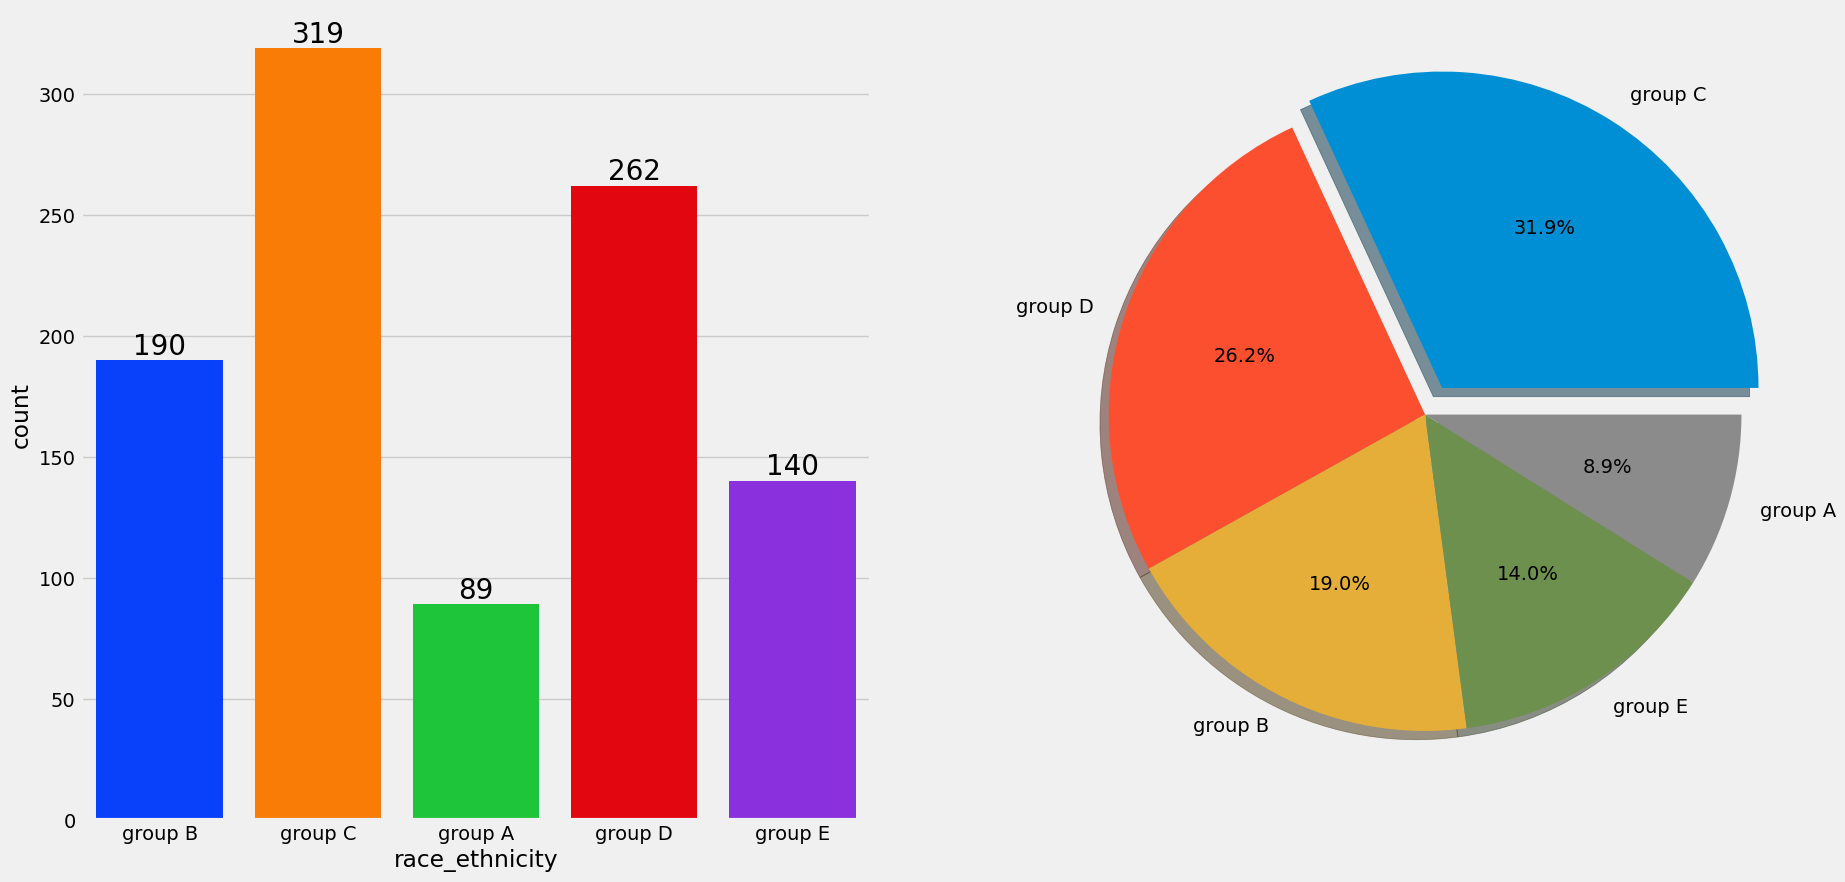

In [96]:
f, ax = plt.subplots(1, 2, figsize=(20,10))


sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)


plt.pie(
    x=df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)

plt.show()

# Insights:
#  1. Most of the students belonging from group C/ group D.
#  2. Lowest number of students belonging to groupA.

# BIVARIATE ANALYSIS ON THE BASIS OF RACE_ETHINICITY COLUMN

In [97]:
Group_data2 = df.groupby('race_ethnicity')
Group_data2

In [98]:
Group_data2['math_score'].mean()

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64

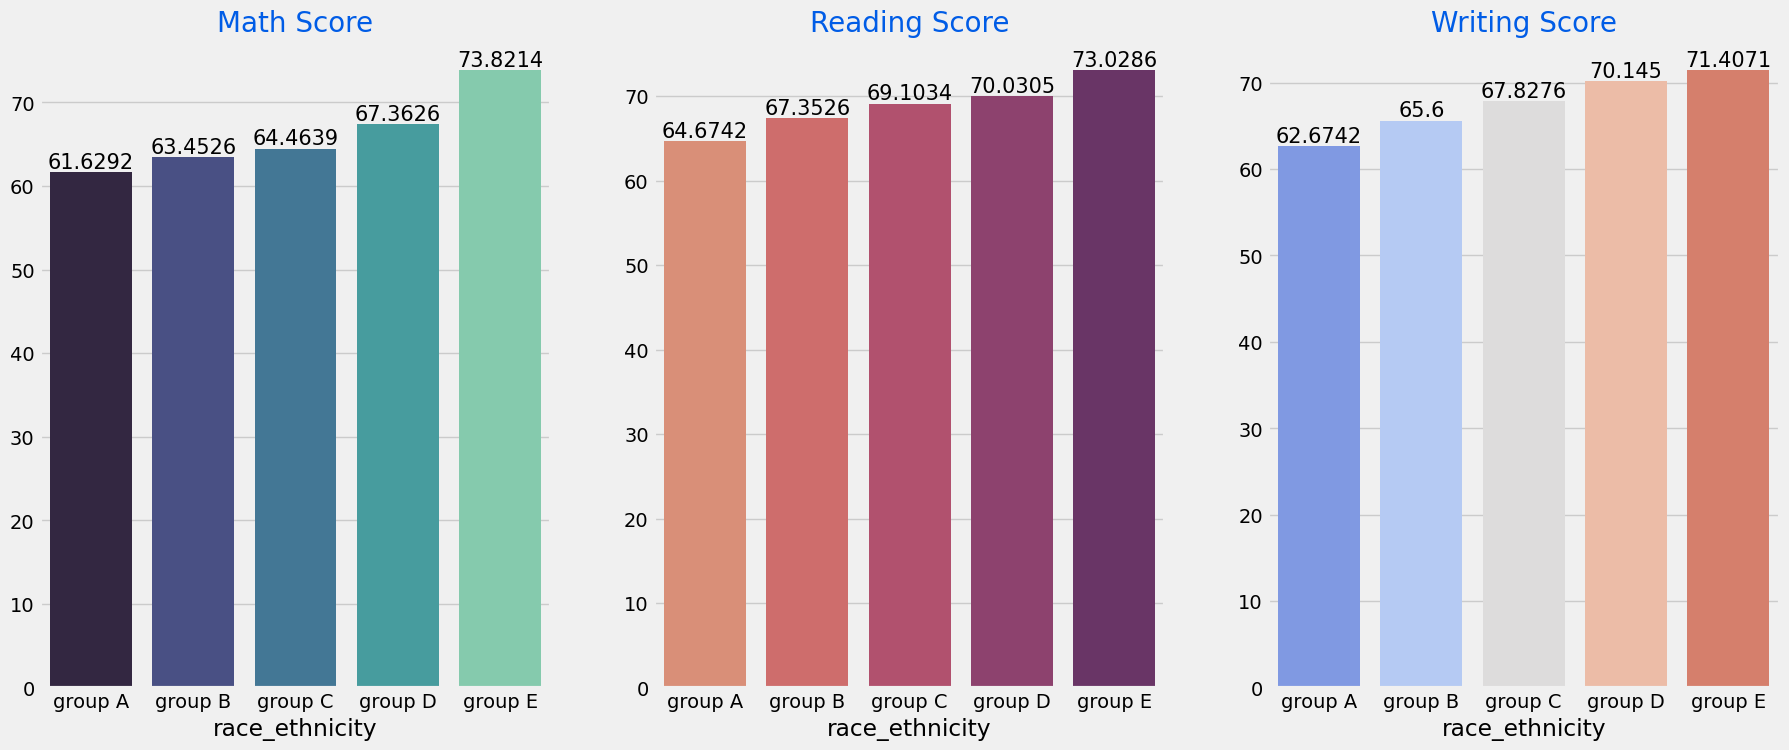

In [125]:
Group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values,palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

# Insights:
#    1. Group E students have scored the highest marks
#    2. Group A students have scored the lowest marks
#    3. Students from a lower Socioeconomic status have a lower avg in all course subjects

# Univariate analysis on the basis of Parental level of education

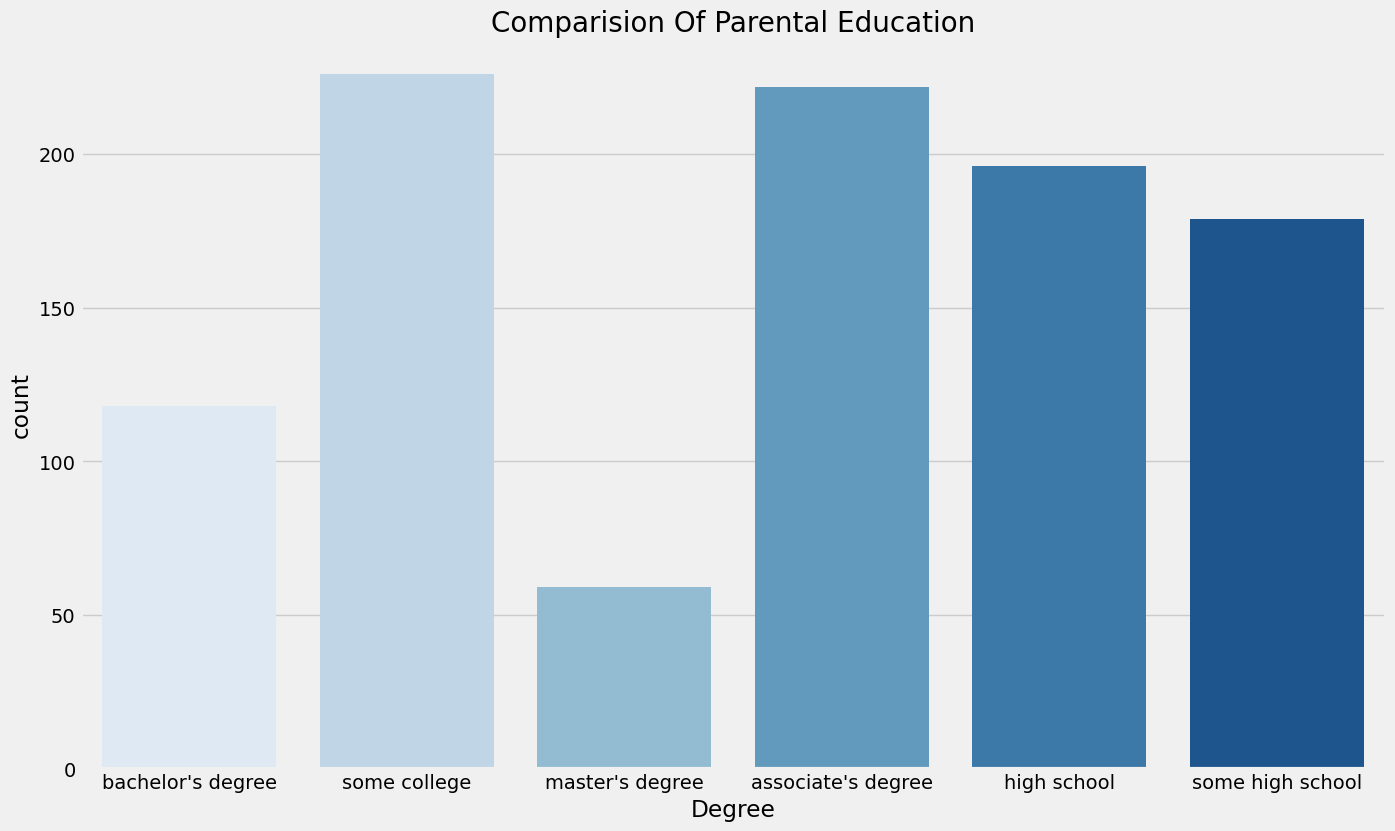

In [100]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x = df['parental_level_of_education'], palette='Blues')
plt.title('Comparision Of Parental Education', fontweight = 30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Insight:
#  1. Largest number of parents are from some college

# Bivariate analysis on the basis of Parental_level_of_education i.e. how parental education has any impCT ON STUDENT'S PERFORMANCE

In [101]:
Group = df.groupby('parental_level_of_education').mean(numeric_only=True)

In [102]:
Group

,math_score,reading_score,writing_score,total_score,average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


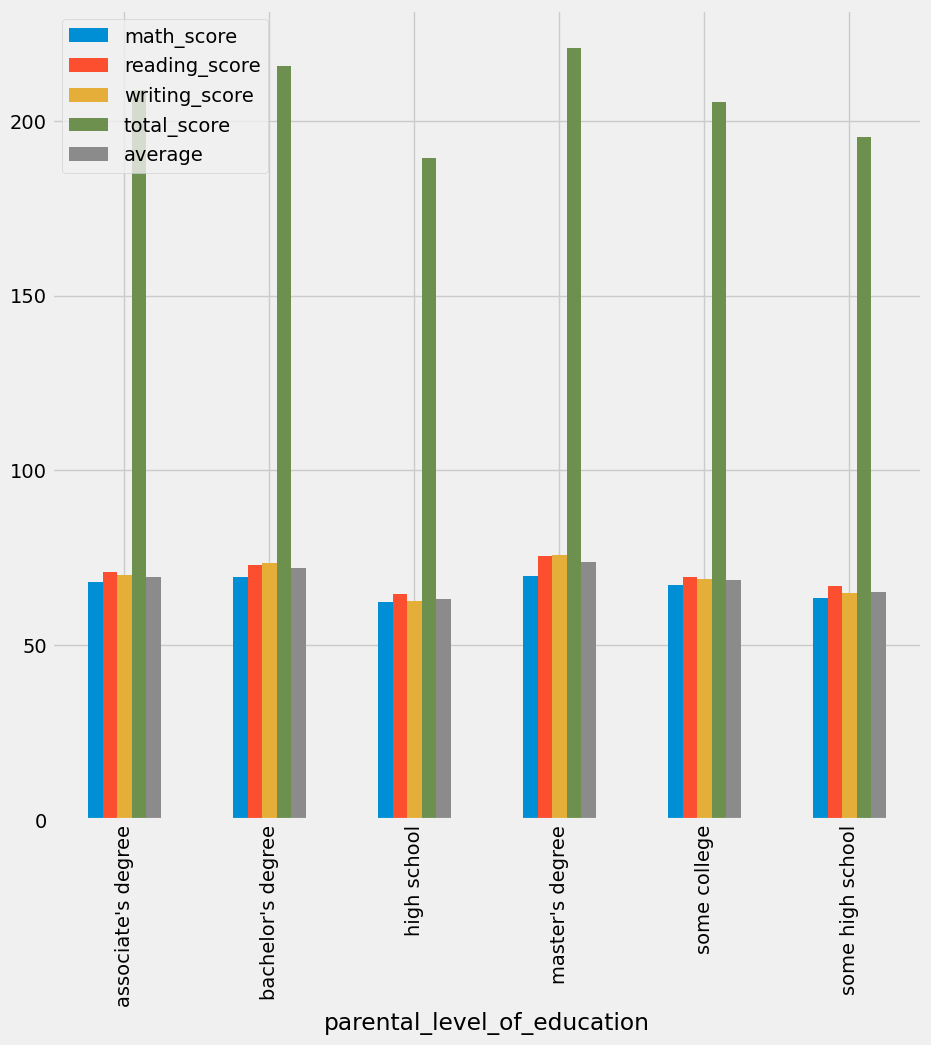

In [103]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='bar', figsize=(10,10))
plt.legend()
plt.show()

# Insight
#  The score of student whose parents possess master and bachelor level education are higher than others.

# UNIVARIATE ANALYSIS ON THE BASIS OF LUNCH COLUMN

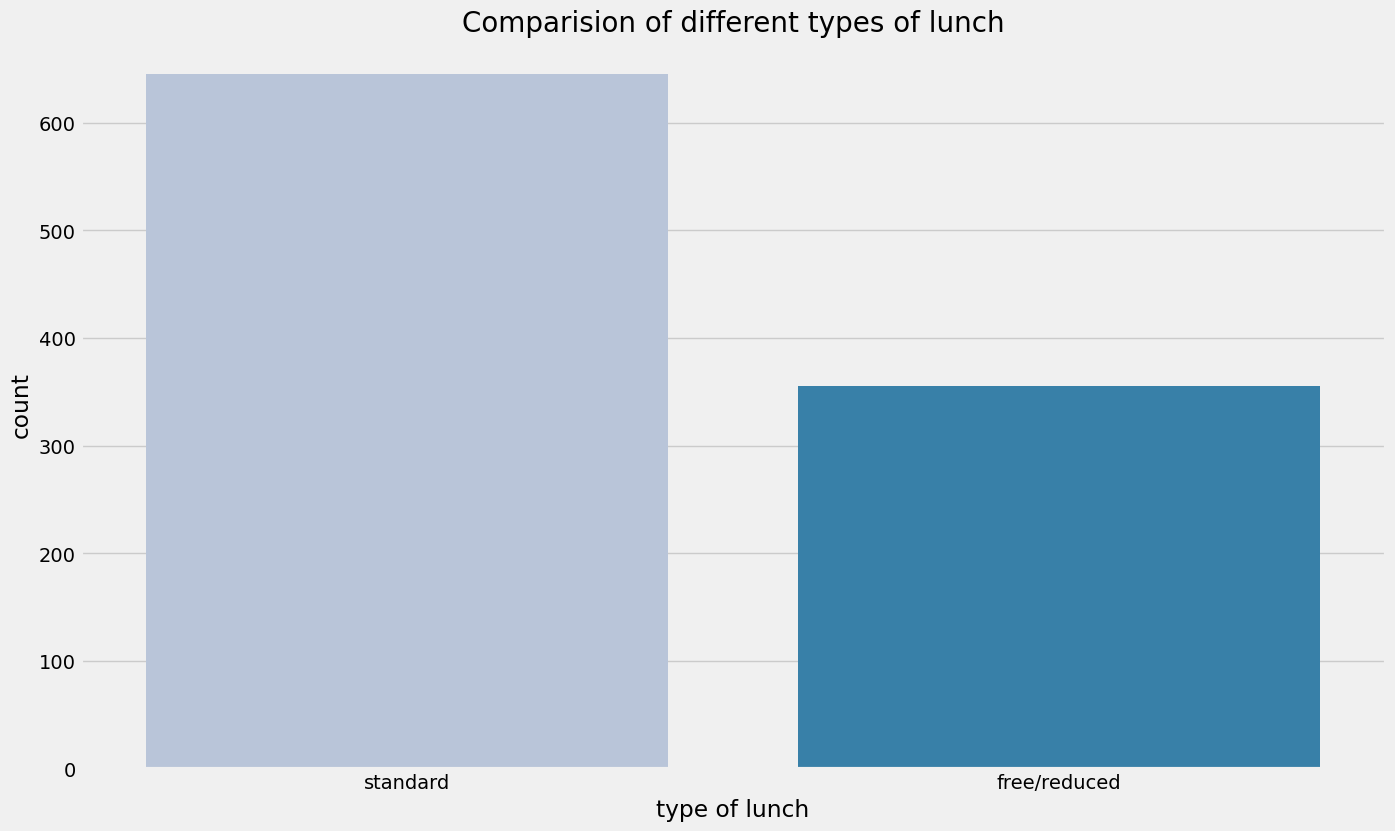

In [111]:
plt.rcParams['figure.figsize']=(15, 9)
sns.countplot(x=df['lunch'], palette='PuBu')
plt.title('Comparision of different types of lunch', fontweight = 30, fontsize=20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

# Insights:
#   1. Students being served Standard lunch was more than free lunch.

# Bivariate Analysis ( Is lunch type intake has any impact on student's performance)

In [112]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='average', ylabel='Count'>

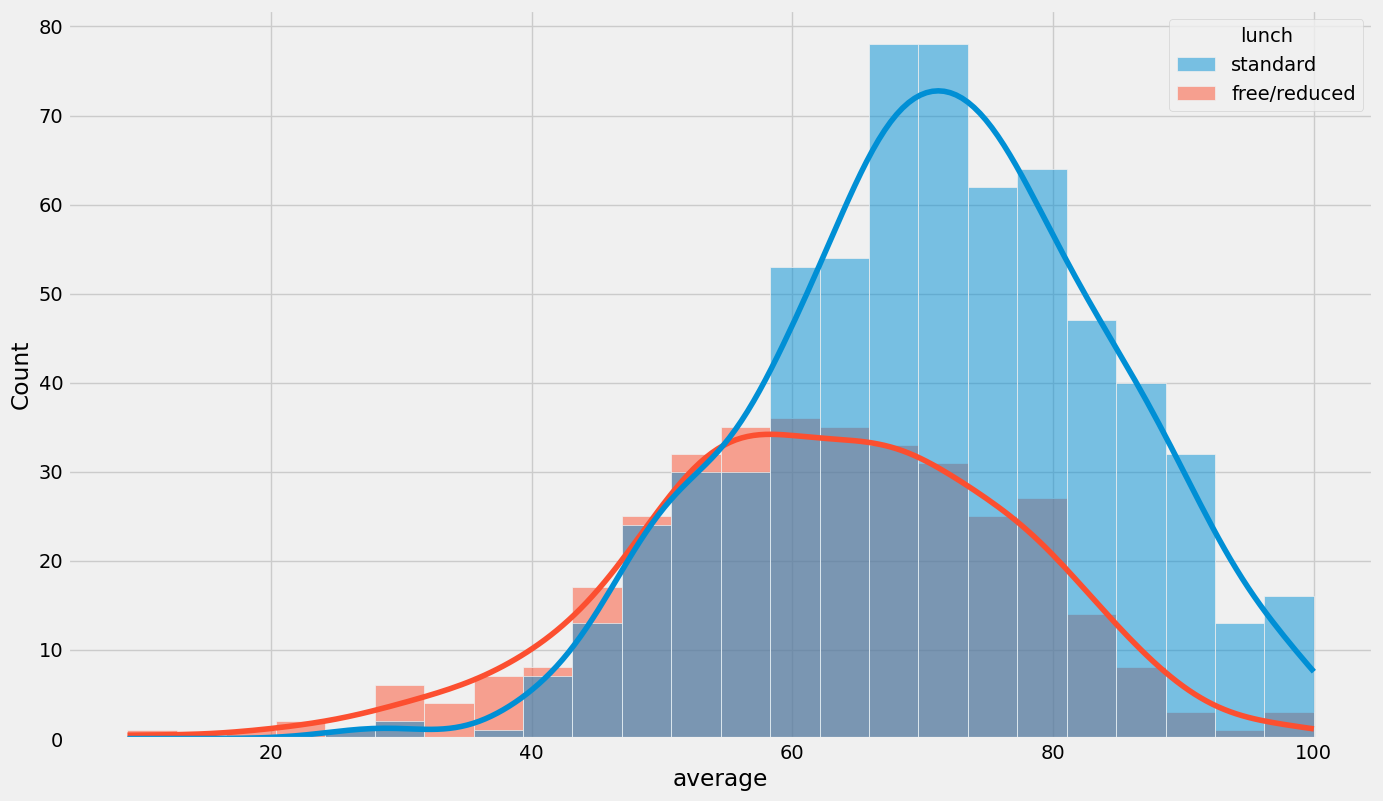

In [120]:
sns.histplot(data=df, x='average',kde=True,hue='lunch')

# Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

# Bivariate analysis on the basis of Test preparation course column.

<Axes: xlabel='lunch', ylabel='writing_score'>

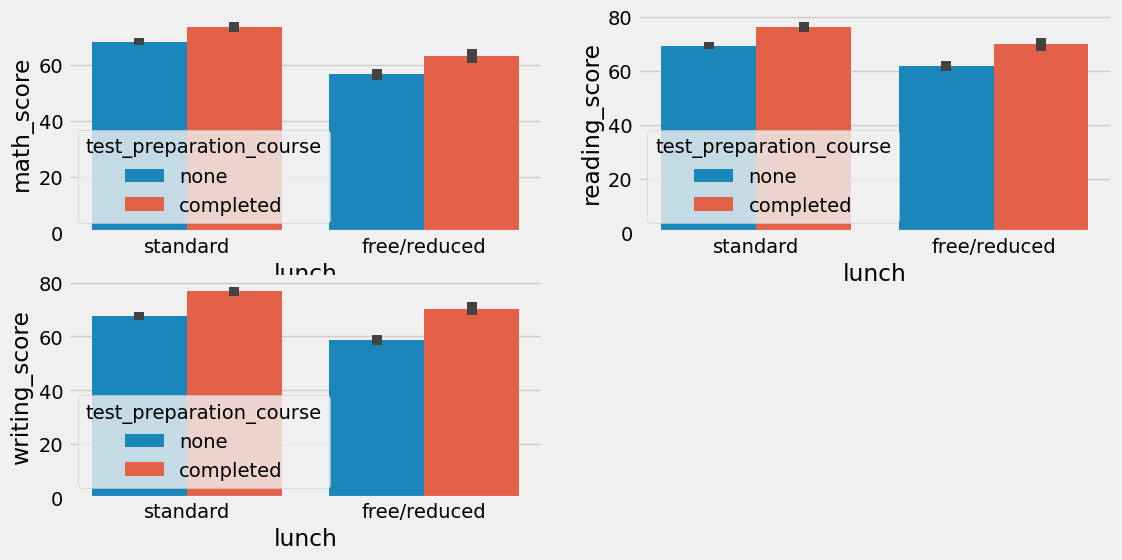

In [121]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Insights:
#   1. Students who have completed the test preparation course have scores higher in all three categories.

# Checking Outliers

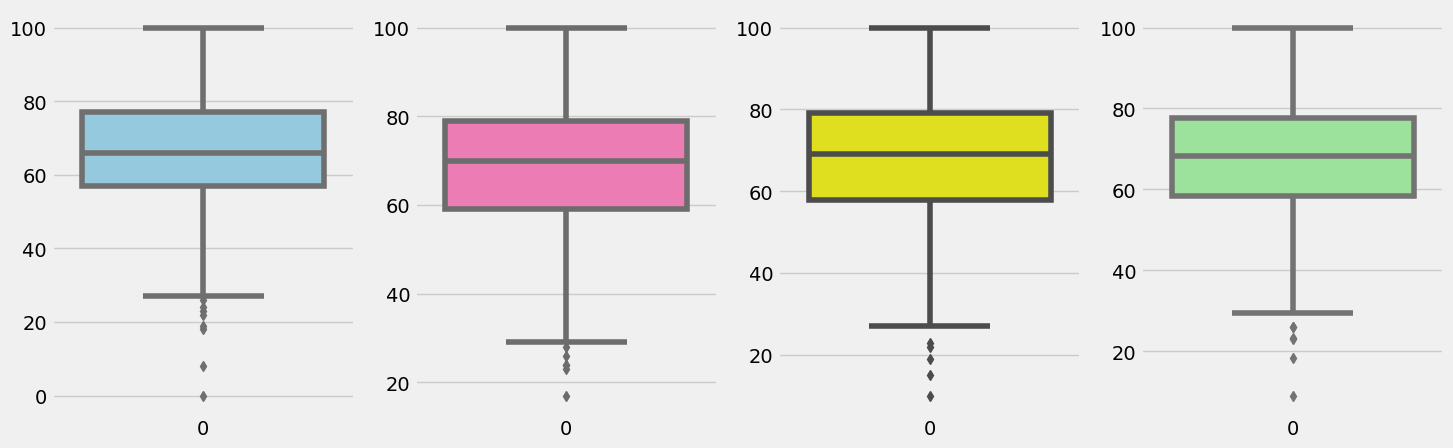

In [123]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# Multivariate analysis using pairplot

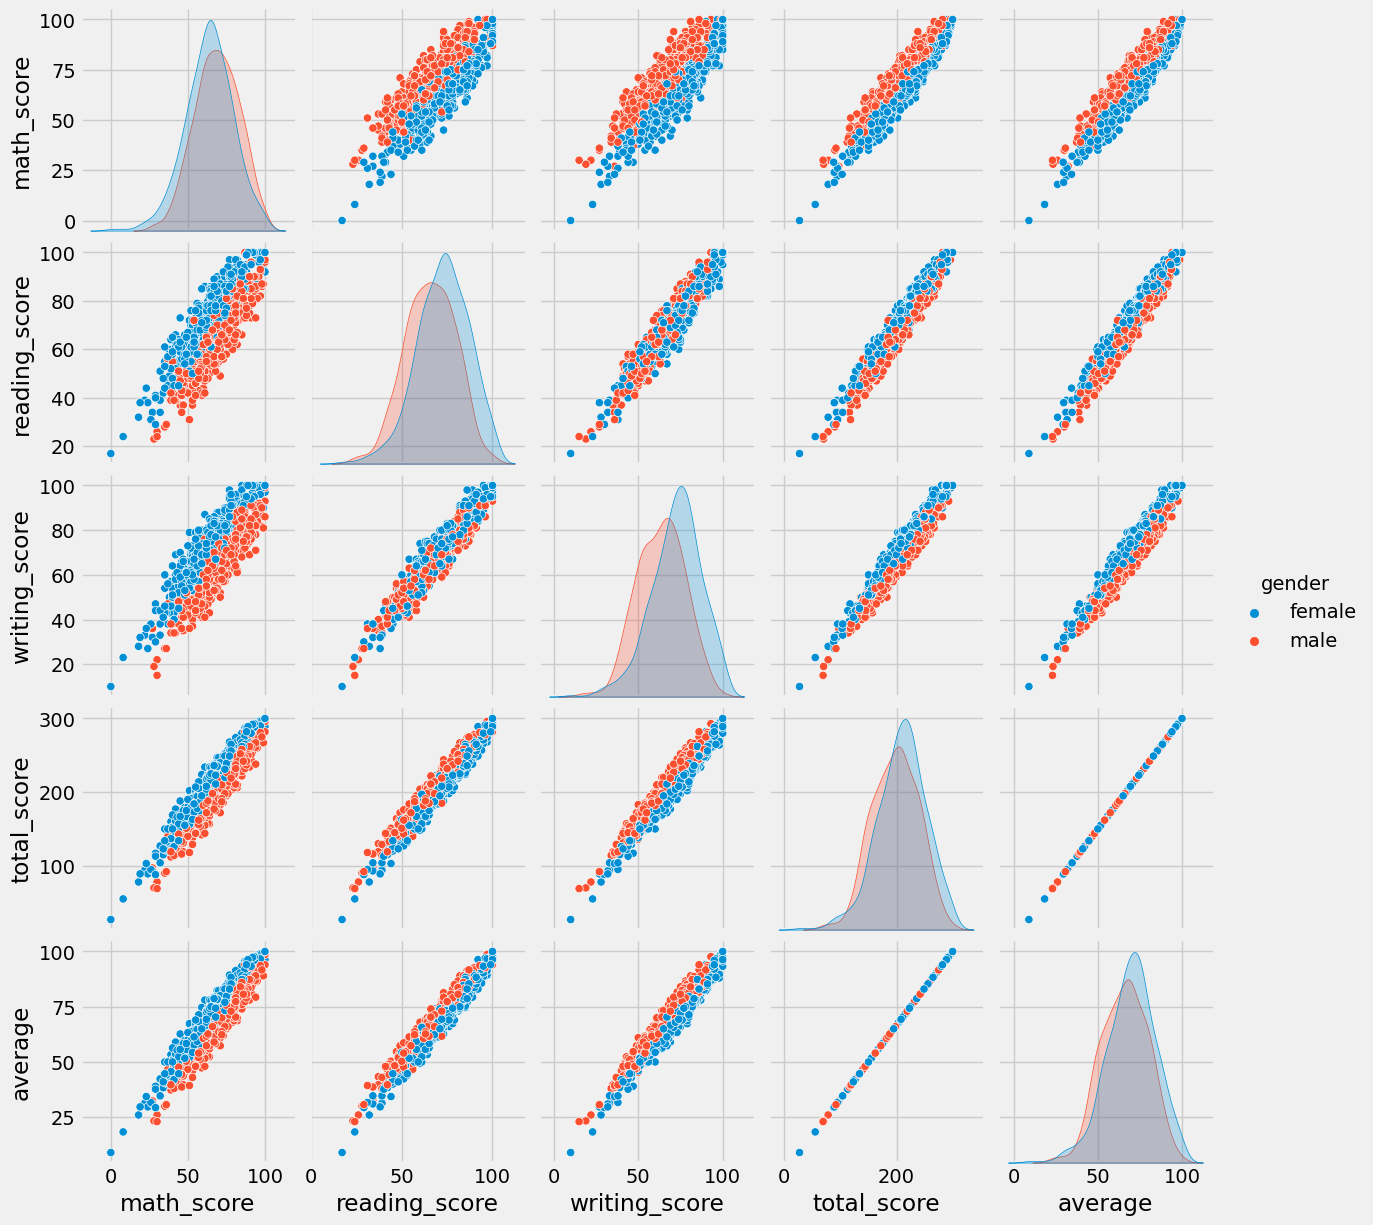

In [124]:
sns.pairplot(df,hue='gender')
plt.show()

# Insight :
#  1. From the above plot it is clear that all the scores increase linearly with each other.

# CONCLUSION:-
#  1. Student's Performance is related with lunch, parental level education
#  2. Females lead in pass percentage and also top scorers.
#  3. Student's Performance is not much related with test preparation course.
#  4. Finishing preparation course is benefitial